In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
customer = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [3]:
spend = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [4]:
repay = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [5]:
repay.drop('Unnamed: 4',axis = 1,inplace = True)

In [6]:
spend.drop('Sl No:',axis = 1 ,inplace = True)

In [7]:
repay.drop('SL No:',axis = 1,inplace = True)

In [8]:
print(customer.shape)
print(repay.shape)
print(spend.shape)

(100, 8)
(1523, 3)
(1500, 4)


In [9]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [10]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [11]:
repay.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [12]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [13]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [14]:
repay.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [15]:
customer.duplicated().sum()

0

In [16]:
spend.duplicated().sum()

0

In [17]:
repay.duplicated().sum()

22

In [18]:
repay.dropna(inplace =  True)

In [19]:
repay.shape

(1500, 3)

In [20]:
repay.duplicated().sum()

0

In [21]:
repay.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

### a. In case age is less than 18, replace it with mean of age values.

In [22]:
mean = customer.Age.mean()
mean

46.49

In [23]:
print('the mean of age is',mean)

the mean of age is 46.49


In [24]:
customer.loc[customer['Age']< 18] = customer['Age'].mean()


In [25]:
new_mean = customer.Age.mean()
new_mean

48.399399999999986

In [26]:
print('the new mean of Age is ', new_mean)

the new mean of Age is  48.399399999999986


In [27]:
customer.loc[customer['Age']<18]['Customer']

Series([], Name: Customer, dtype: object)

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [28]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [29]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [30]:
cust_spend = pd.merge(left=customer,right= spend, how = 'right',on = 'Customer')
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,67.0,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,4-Feb-06,BUS TICKET,356872.73
1496,NaN,A68,NaN,NaN,NaN,NaN,NaN,NaN,25-Mar-06,BUS TICKET,204971.10
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,31-Mar-06,BUS TICKET,50449.44
1498,NaN,A70,NaN,NaN,NaN,NaN,NaN,NaN,23-Mar-06,BUS TICKET,80593.94


In [31]:
cust_spend.shape

(1500, 11)

In [32]:
cust_spend.isna().sum()

No          70
Customer     0
Age         70
City        70
Product     70
Limit       70
Company     70
Segment     70
Month        0
Type         0
Amount       0
dtype: int64

In [33]:
cust_spend.dropna(inplace = True)

In [34]:
cust_spend.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
Month       0
Type        0
Amount      0
dtype: int64

In [35]:
cust_spend.loc[cust_spend['Amount']> cust_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
7,8.0,A8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,5-Feb-04,BIKE,155562.58
18,19.0,A19,27.0,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt,4-Apr-05,FOOD,441442.26
19,20.0,A20,27.0,CALCUTTA,Platimum,10001.0,C20,Govt,30-Apr-06,JEWELLERY,356733.48
20,21.0,A21,57.0,COCHIN,Platimum,10002.0,C21,Normal Salary,25-Apr-04,PETRO,190011.63
21,22.0,A22,27.0,BOMBAY,Silver,100000.0,C22,Self Employed,19-Apr-06,CLOTHES,423672.50
...,...,...,...,...,...,...,...,...,...,...,...
1483,57.0,A57,37.0,TRIVANDRUM,Silver,100001.0,C19,Normal Salary,12-Jan-04,PETRO,179402.44
1484,58.0,A58,32.0,CALCUTTA,Silver,100002.0,C20,Normal Salary,3-Jan-04,CLOTHES,383742.74
1485,59.0,A59,74.0,BANGALORE,Silver,100003.0,C21,Normal Salary,15-Jan-04,FOOD,181115.20
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,31-Mar-06,BUS TICKET,50449.44


In [36]:
cust_spend.loc[cust_spend['Amount']> cust_spend['Limit'],'Amount'] = (.5 * cust_spend["Limit"])

In [37]:
cust_spend.loc[cust_spend['Amount']> cust_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [38]:
customer.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [39]:
repay.head(1)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75


In [40]:
cust_repay = pd.merge(left = customer , right = repay , on= ['Customer'],how = 'right')
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,67.0,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,9-May-05,55638.77
1496,NaN,A68,NaN,NaN,NaN,NaN,NaN,NaN,10-May-06,319836.49
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,11-Jul-06,247628.45
1498,NaN,A70,NaN,NaN,NaN,NaN,NaN,NaN,12-Aug-05,454016.51


In [41]:
cust_repay.isna().sum()

No          70
Customer     0
Age         70
City        70
Product     70
Limit       70
Company     70
Segment     70
Month        0
Amount       0
dtype: int64

In [42]:
cust_repay.dropna(inplace =True)

In [43]:
cust_repay[cust_repay["Amount"] > cust_repay["Limit"]]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
7,8.0,A8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,5-Feb-04,156913.59
8,9.0,A9,79.0,CHENNAI,Silver,100003.0,C9,Govt,28-Feb-05,417294.81
17,18.0,A18,34.0,BANGALORE,Silver,100000.0,C18,Salaried_MNC,5-Mar-06,213352.06
18,19.0,A19,27.0,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt,4-Apr-05,347826.27
19,20.0,A20,27.0,CALCUTTA,Platimum,10001.0,C20,Govt,30-Apr-06,471099.22
...,...,...,...,...,...,...,...,...,...,...
1474,57.0,A57,37.0,TRIVANDRUM,Silver,100001.0,C19,Normal Salary,5-Feb-04,285552.80
1476,59.0,A59,74.0,BANGALORE,Silver,100003.0,C21,Normal Salary,16-Feb-05,337836.23
1483,57.0,A57,37.0,TRIVANDRUM,Silver,100001.0,C19,Normal Salary,19-Mar-04,207786.09
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,11-Jul-06,247628.45


In [44]:
cust_repay.loc[cust_repay["Amount"] > cust_repay["Limit"],"Amount"] = cust_repay["Limit"]

In [45]:
cust_repay[cust_repay["Amount"] > cust_repay["Limit"]]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount


### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [46]:
distinct_customer =  customer["Customer"].nunique()
distinct_customer
print("Number of distinct customer are",distinct_customer)

Number of distinct customer are 95


#### b. How many distinct categories exist?

In [47]:
customer.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [48]:
customer["Segment"].value_counts()

Govt             27
Normal Salary    22
Self Employed    20
Salaried_MNC     13
Salaried_Pvt     12
46.49             6
Name: Segment, dtype: int64

#### c. What is the average monthly spend by customers?

In [52]:
spend.head(1)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.8


In [50]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [53]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [54]:
spend.dtypes

Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [55]:
 spend['Monthly'] = spend['Month'].apply(lambda x : pd.Timestamp.strftime(x, format ="%B" ))

In [56]:
 spend['Yearly'] = spend['Month'].apply(lambda x : pd.Timestamp.strftime(x, format ="%Y" ))

In [57]:
spend.head(2)

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004


In [59]:
spend.groupby(['Yearly','Monthly']).mean()

Amount
Yearly Monthly                 
2004   April      235272.037143
       February   221215.270000
       January    251712.068664
       March      232146.119286
       May        217539.236429
       November   270486.397857
       September  310923.383571
2005   April      252181.326429
       August     233734.634286
       December   147503.060000
       February   229802.279821
       January    292741.372857
       July       229116.663571
       June       262688.112857
       May        245696.515429
       November   286143.322857
       October    194568.640714
       September  188666.202143
2006   April      232468.967553
       August     240699.717143
       December   270470.980714
       February   253858.260714
       January    282058.006429
       July       287505.098929
       June       177252.386429
       March      247166.084654
       May        236162.740357
       November   182841.290000
       October    236136.335000
       September  158520.090714

In [60]:
repay.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [61]:
repay.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [62]:
repay['Month'] = pd.to_datetime(repay['Month'])

In [63]:
repay.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [66]:
repay['Monthly'] = repay["Month"].apply(lambda x : pd.Timestamp.strftime(x, format = "%B"))

In [67]:
repay['Yearly'] = repay["Month"].apply(lambda x : pd.Timestamp.strftime(x, format = "%Y"))

In [68]:
repay.head(2)

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004


In [71]:
repay.groupby(['Yearly','Monthly']).mean()

Amount
Yearly Monthly                 
2004   April      259141.679000
       February   256702.630741
       January    243489.649786
       March      252585.280667
       May        226162.720800
       November   209592.238000
       September  184487.848750
2005   April      212688.631333
       August     264430.921622
       December   320379.335833
       February   238829.265123
       January    240548.098148
       July       239871.479167
       June       210199.818333
       May        263207.367857
       November   256695.120000
       October    219849.956667
       September  247700.170000
2006   April      275472.251889
       August     224143.992500
       December   252736.569167
       February   284489.565128
       January    293475.389167
       July       257936.383243
       June       251990.453333
       March      240851.266814
       May        256920.884943
       November   199399.197407
       October    260765.480000
       September  262533.880833

#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
 #### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
 #### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [72]:
spend.head(1)

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.8,January,2004


In [85]:
repay.head(1)

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004


In [91]:
spend_repay =  pd.merge(left = spend , right = repay , on = 'Customer', how = 'inner')
spend_repay

,Customer,Month_x,Type,Amount_x,Monthly_x,Yearly_x,Month_y,Amount_y,Monthly_y,Yearly_y
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004,2004-01-12,495414.75,January,2004
1,A1,2004-01-12,JEWELLERY,485470.80,January,2004,2004-01-03,245899.02,January,2004
2,A1,2004-01-12,JEWELLERY,485470.80,January,2004,2004-01-15,259490.06,January,2004
3,A1,2004-01-12,JEWELLERY,485470.80,January,2004,2004-01-25,437555.12,January,2004
4,A1,2004-01-12,JEWELLERY,485470.80,January,2004,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...
37279,A7,2006-04-19,JEWELLERY,165956.43,April,2006,2005-11-22,55108.71,November,2005
37280,A7,2006-04-19,JEWELLERY,165956.43,April,2006,2005-12-03,429700.12,December,2005
37281,A7,2006-04-19,JEWELLERY,165956.43,April,2006,2005-02-23,344628.72,February,2005
37282,A7,2006-04-19,JEWELLERY,165956.43,April,2006,2006-03-31,336264.37,March,2006


In [93]:
spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [96]:
interest = spend_repay.groupby(["Yearly_x","Monthly_y"])['Spend_Amount','Repay_Amount'].sum()
interest

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2852\1555700642.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest = spend_repay.groupby(["Yearly_x","Monthly_y"])['Spend_Amount','Repay_Amount'].sum()


Spend_Amount  Repay_Amount
Yearly_x Monthly_y                            
2004     April      2.719093e+08  2.774687e+08
         August     8.867928e+07  9.195231e+07
         December   4.091251e+07  5.173985e+07
         February   3.884103e+08  3.814803e+08
         January    5.675602e+08  5.691749e+08
         July       8.211787e+07  8.350854e+07
         June       8.780029e+07  7.829612e+07
         March      3.325041e+08  3.207992e+08
         May        4.537716e+08  4.881357e+08
         November   1.515547e+08  1.415202e+08
         October    4.221194e+07  3.814378e+07
         September  7.564120e+07  6.961479e+07
2005     April      3.532180e+08  3.715428e+08
         August     1.125874e+08  1.120132e+08
         December   5.049179e+07  6.192400e+07
         February   5.107264e+08  5.240433e+08
         January    7.179338e+08  7.098730e+08
         July       1.064356e+08  1.128224e+08
         June       1.251865e+08  1.091094e+08
         March      4.362483e+08  4.364300e+08
         May        5.862346e+08  6.510356e+08
         November   1.949083e+08  1.779714e+08
         October    5.022830e+07  5.223449e+07
         September  8.902154e+07  8.461567e+07
2006     April      3.282440e+08  3.636848e+08
         August     1.116420e+08  1.154498e+08
         December   5.121710e+07  5.665850e+07
         February   4.766512e+08  4.866626e+08
         January    6.823352e+08  6.909399e+08
         July       1.036352e+08  1.082138e+08
         June       1.123723e+08  1.031161e+08
         March      4.469005e+08  4.482409e+08
         May        5.853777e+08  6.446678e+08
         November   1.769215e+08  1.710064e+08
         October    4.868923e+07  4.880927e+07
         September  8.617275e+07  8.206724e+07

In [97]:
interest['monthly_profit'] =interest['Repay_Amount'] - interest['Spend_Amount']

In [98]:
interest

Spend_Amount  Repay_Amount  monthly_profit
Yearly_x Monthly_y                                            
2004     April      2.719093e+08  2.774687e+08      5559467.31
         August     8.867928e+07  9.195231e+07      3273029.74
         December   4.091251e+07  5.173985e+07     10827339.87
         February   3.884103e+08  3.814803e+08     -6929923.97
         January    5.675602e+08  5.691749e+08      1614632.09
         July       8.211787e+07  8.350854e+07      1390661.58
         June       8.780029e+07  7.829612e+07     -9504164.64
         March      3.325041e+08  3.207992e+08    -11704932.27
         May        4.537716e+08  4.881357e+08     34364179.99
         November   1.515547e+08  1.415202e+08    -10034481.10
         October    4.221194e+07  3.814378e+07     -4068153.41
         September  7.564120e+07  6.961479e+07     -6026412.66
2005     April      3.532180e+08  3.715428e+08     18324852.99
         August     1.125874e+08  1.120132e+08      -574191.59
         December   5.049179e+07  6.192400e+07     11432204.05
         February   5.107264e+08  5.240433e+08     13316916.37
         January    7.179338e+08  7.098730e+08     -8060795.16
         July       1.064356e+08  1.128224e+08      6386776.45
         June       1.251865e+08  1.091094e+08    -16077078.90
         March      4.362483e+08  4.364300e+08       181721.19
         May        5.862346e+08  6.510356e+08     64801037.25
         November   1.949083e+08  1.779714e+08    -16936909.04
         October    5.022830e+07  5.223449e+07      2006191.59
         September  8.902154e+07  8.461567e+07     -4405868.15
2006     April      3.282440e+08  3.636848e+08     35440768.58
         August     1.116420e+08  1.154498e+08      3807796.12
         December   5.121710e+07  5.665850e+07      5441399.74
         February   4.766512e+08  4.866626e+08     10011328.67
         January    6.823352e+08  6.909399e+08      8604754.80
         July       1.036352e+08  1.082138e+08      4578594.00
         June       1.123723e+08  1.031161e+08     -9256205.79
         March      4.469005e+08  4.482409e+08      1340376.51
         May        5.853777e+08  6.446678e+08     59290127.82
         November   1.769215e+08  1.710064e+08     -5915134.32
         October    4.868923e+07  4.880927e+07       120039.89
         September  8.617275e+07  8.206724e+07     -4105510.15

In [101]:
interest_positive = interest.loc[interest['monthly_profit']  > 0]

In [105]:
interest_positive['Interest_Earned'] = (2.9* interest['monthly_profit'])/100

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2852\2949877106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_positive['Interest_Earned'] = (2.9* interest['monthly_profit'])/100


In [106]:
interest_positive

Spend_Amount  Repay_Amount  monthly_profit  \
Yearly_x Monthly_y                                               
2004     April      2.719093e+08  2.774687e+08      5559467.31   
         August     8.867928e+07  9.195231e+07      3273029.74   
         December   4.091251e+07  5.173985e+07     10827339.87   
         January    5.675602e+08  5.691749e+08      1614632.09   
         July       8.211787e+07  8.350854e+07      1390661.58   
         May        4.537716e+08  4.881357e+08     34364179.99   
2005     April      3.532180e+08  3.715428e+08     18324852.99   
         December   5.049179e+07  6.192400e+07     11432204.05   
         February   5.107264e+08  5.240433e+08     13316916.37   
         July       1.064356e+08  1.128224e+08      6386776.45   
         March      4.362483e+08  4.364300e+08       181721.19   
         May        5.862346e+08  6.510356e+08     64801037.25   
         October    5.022830e+07  5.223449e+07      2006191.59   
2006     April      3.282440e+08  3.636848e+08     35440768.58   
         August     1.116420e+08  1.154498e+08      3807796.12   
         December   5.121710e+07  5.665850e+07      5441399.74   
         February   4.766512e+08  4.866626e+08     10011328.67   
         January    6.823352e+08  6.909399e+08      8604754.80   
         July       1.036352e+08  1.082138e+08      4578594.00   
         March      4.469005e+08  4.482409e+08      1340376.51   
         May        5.853777e+08  6.446678e+08     59290127.82   
         October    4.868923e+07  4.880927e+07       120039.89   

                    Interest_Earned  
Yearly_x Monthly_y                   
2004     April         1.612246e+05  
         August        9.491786e+04  
         December      3.139929e+05  
         January       4.682433e+04  
         July          4.032919e+04  
         May           9.965612e+05  
2005     April         5.314207e+05  
         December      3.315339e+05  
         February      3.861906e+05  
         July          1.852165e+05  
         March         5.269915e+03  
         May           1.879230e+06  
         October       5.817956e+04  
2006     April         1.027782e+06  
         August        1.104261e+05  
         December      1.578006e+05  
         February      2.903285e+05  
         January       2.495379e+05  
         July          1.327792e+05  
         March         3.887092e+04  
         May           1.719414e+06  
         October       3.481157e+03

#### f. What are the top 5 product types?

In [107]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [109]:
spend.Type.value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

#### g. Which city is having maximum spend?

In [116]:
cust_spend.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [123]:
cust_spend.groupby('City')['Amount'].sum().sort_values(ascending = False).head(1)

City
CALCUTTA    41108132.3
Name: Amount, dtype: float64

#### h. Which age group is spending more money?

In [124]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [130]:
cust_spend["Age_Group"] =  pd.cut(cust_spend["Age"],bins=['18','26','34','42','50','58','66','74',82],labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)
cust_spend

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\reshape\tile.py:430: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ids[np.asarray(x) == bins[0]] = 1


,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Age_Group
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82,74-82
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82,74-82
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82,74-82
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82,74-82
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,65.0,A65,41.0,COCHIN,Gold,500000.0,C27,Salaried_Pvt,23-Feb-05,BUS TICKET,98178.42,34-42,34-42
1494,66.0,A66,77.0,PATNA,Gold,500000.0,C28,Govt,3-Feb-05,BUS TICKET,162670.43,74-82,74-82
1495,67.0,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,4-Feb-06,BUS TICKET,356872.73,50-58,50-58
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,31-Mar-06,BUS TICKET,5000.00,26-34,26-34


In [133]:
cust_spend.groupby('Age_Group')['Amount'].sum().sort_values(ascending = False).head(1)

Age_Group
34-42    39664773.38
Name: Amount, dtype: float64

#### i. Who are the top 10 customers in terms of repayment?

In [135]:
cust_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [138]:
cust_repay.groupby('Customer')['Amount'].sum().sort_values(ascending= False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A44     7744730.12
A39     7622483.30
A42     7615460.86
A38     7470956.35
Name: Amount, dtype: float64

#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [143]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...
1493,65.0,A65,41.0,COCHIN,Gold,500000.0,C27,Salaried_Pvt,23-Feb-05,BUS TICKET,98178.42,34-42
1494,66.0,A66,77.0,PATNA,Gold,500000.0,C28,Govt,3-Feb-05,BUS TICKET,162670.43,74-82
1495,67.0,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,4-Feb-06,BUS TICKET,356872.73,50-58
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,31-Mar-06,BUS TICKET,5000.00,26-34


In [145]:
cust_spend['Month'] = pd.to_datetime(cust_spend['Month'] )

In [146]:
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82


In [147]:
cust_spend['Year']  = cust_spend['Month'].apply( lambda x : pd.Timestamp.strftime(x, format = "%Y"))

In [148]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,Year
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005


In [151]:
customer_spend_pivot = pd.pivot_table(data = cust_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   7460145.61  1112732.30  1291852.58
           2005   8706615.03   912284.97   830612.34
           2006   9582502.52   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   706804.44   508988.54
           2006   7917144.31   967129.51  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  2199994.82   814229.62
           2005  12110613.03  1278274.70   652269.38
           2006  10234260.11  2748735.38  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   200002.00
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   505862.12

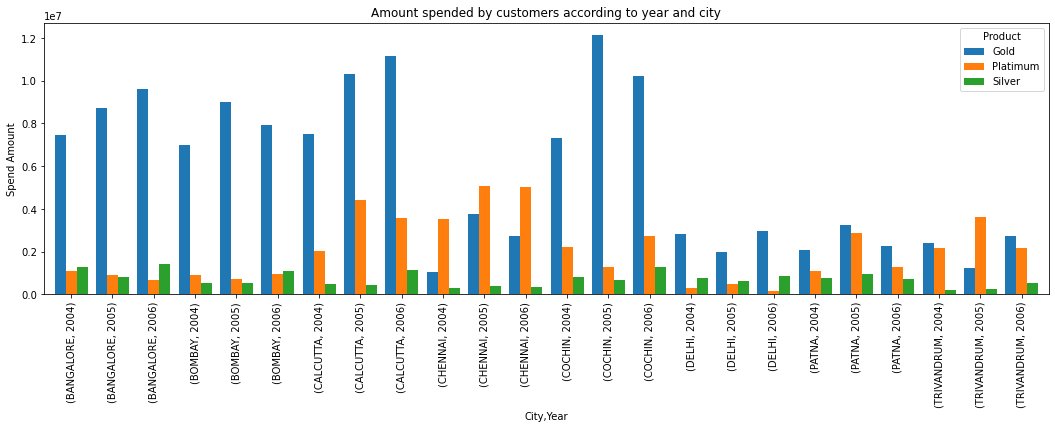

In [161]:
customer_spend_pivot.plot(kind = 'bar',figsize=(18,5),width = 0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

### 4. Create graphs for
#### a. Monthly comparison of total spends, city wise

In [164]:
cust_spend['Months'] = cust_spend['Month'].apply(lambda x : pd.Timestamp.strftime( x , format = "%B"))
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,Year,Months
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,65.0,A65,41.0,COCHIN,Gold,500000.0,C27,Salaried_Pvt,2005-02-23,BUS TICKET,98178.42,34-42,2005,February
1494,66.0,A66,77.0,PATNA,Gold,500000.0,C28,Govt,2005-02-03,BUS TICKET,162670.43,74-82,2005,February
1495,67.0,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,2006-02-04,BUS TICKET,356872.73,50-58,2006,February
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006-03-31,BUS TICKET,5000.00,26-34,2006,March


In [170]:
month_city=pd.pivot_table(data = cust_spend , values = "Amount",index = 'Months',columns = 'City', aggfunc = 'sum')
month_city

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Months,,,,,,,,
April,3199801.25,1873785.01,3457507.95,2518656.99,2892768.29,777240.75,2338179.53,1199293.45
August,505045.52,1066744.75,1548354.02,305875.97,2111348.93,155402.16,419383.64,453773.94
December,132283.01,140040.71,55001.50,223628.27,909533.05,842342.02,50000.00,640922.26
February,4775578.95,4271987.80,8150545.61,4385815.95,4602112.17,1494064.06,2353333.55,2857123.89
January,7673155.76,5948993.33,9064864.90,4466961.36,9808001.73,2714261.45,4916205.55,3694671.51
July,1665885.02,177726.32,2234573.27,693825.77,1246457.66,50001.50,50000.00,260484.50
June,960188.70,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
March,4924194.80,5222850.00,4939040.04,3183643.71,5008975.34,2267149.02,1437166.61,2342316.51
May,5197136.75,3891945.60,5578246.87,2856199.62,5611381.45,1600322.07,2136586.80,2813534.48


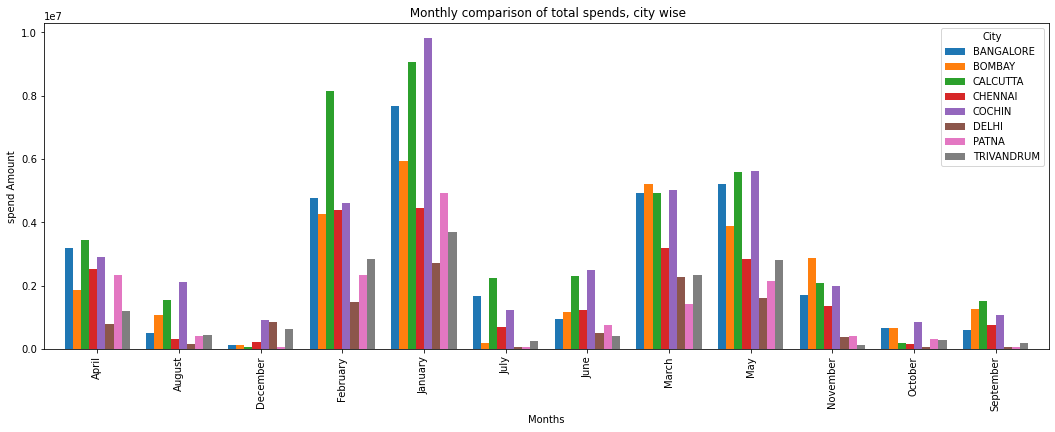

In [173]:
month_city.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("spend Amount")
plt.title(" Monthly comparison of total spends, city wise")
plt.show()

### b. Comparison of yearly spend on air tickets

In [212]:
tickets = cust_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [213]:
air_tickets = tickets.loc[tickets["Type"]=="AIR TICKET"]


In [214]:
air_tickets

,Year,Type,Amount
0,2004,AIR TICKET,3882511.22
15,2005,AIR TICKET,9284651.23
30,2006,AIR TICKET,4864568.37


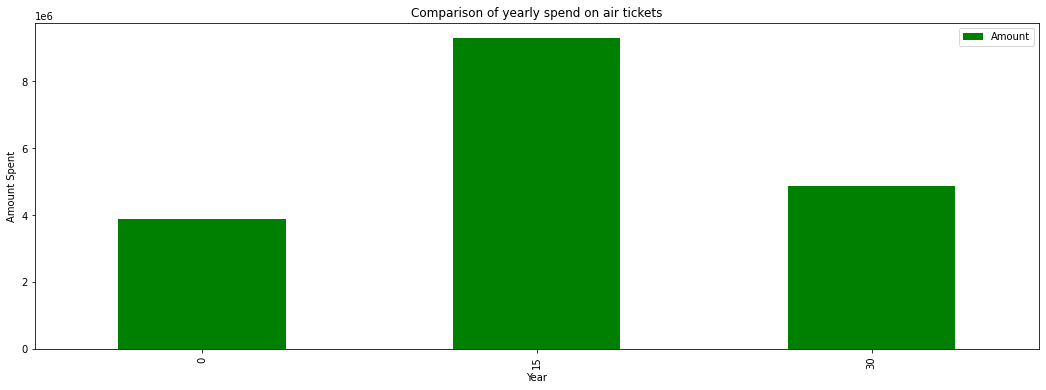

In [218]:
air_tickets.plot(kind = 'bar',figsize=(18,6),color = 'green')
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

 ### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [219]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,Year,Months
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,65.0,A65,41.0,COCHIN,Gold,500000.0,C27,Salaried_Pvt,2005-02-23,BUS TICKET,98178.42,34-42,2005,February
1494,66.0,A66,77.0,PATNA,Gold,500000.0,C28,Govt,2005-02-03,BUS TICKET,162670.43,74-82,2005,February
1495,67.0,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,2006-02-04,BUS TICKET,356872.73,50-58,2006,February
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006-03-31,BUS TICKET,5000.00,26-34,2006,March


In [220]:
product_wise = pd.pivot_table(data=cust_spend,index='Product',columns='Months',values='Amount',aggfunc='sum')

In [221]:
product_wise

Months,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,11897511.09,4764013.99,2043056.73,22820263.74,31045190.75,4605083.70,6168365.44,18818264.21,20362191.38,8635623.44,2603937.44,3708381.42
Platimum,4457399.48,1508805.12,750156.19,7983279.87,13045206.70,1243716.62,2965712.71,6647665.99,7182222.25,1603449.10,550275.04,1365110.14
Silver,1902322.65,293109.82,200537.90,2087018.37,4196718.14,530153.72,689537.61,3859405.83,2140940.01,691102.63,100001.50,442803.13


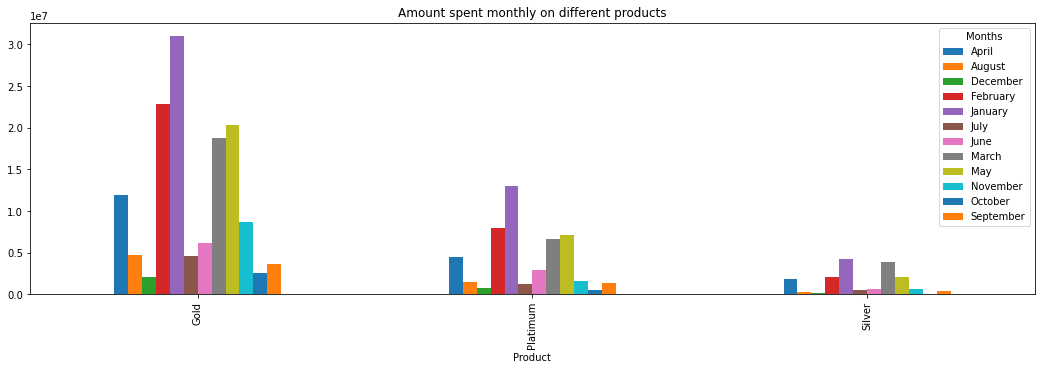

In [232]:
product_wise.plot( kind = 'bar',figsize = (18,5))
plt.title("Amount spent monthly on different products")
plt.show()

###  (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [233]:
cust_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


In [237]:
cust_repay.dtypes

No          float64
Customer     object
Age         float64
City         object
Product      object
Limit       float64
Company      object
Segment      object
Month        object
Amount      float64
dtype: object

In [238]:
cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])

In [239]:
cust_repay['Monthly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_repay['Yearly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [240]:
cust_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Monthly,Yearly
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January,2004
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January,2005


In [250]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [251]:
summary_report('gold','monthly')


Give the product name and timeperiod for which you want the data


Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        NaN   508638.02   
                   A16       1071852.72   367100.15   92055.06   886861.02   
                   A32              NaN   137150.37  284410.26   540858.16   
                   A45       2033076.43         NaN  303151.38   869686.35   
                   A61       1755251.93   441593.08        NaN   382632.66   
                   A65        468922.60         NaN       